# Module 6: Vectorized Programming
## Lecture 2: Array Indexing, Slicing, and Broadcasting

CSCI 1360: Foundations for Informatics and Analytics


## Overview and Objectives

Most of this lecture will be a review of basic indexing and slicing operations, albeit within the context of NumPy arrays. Therefore, there will be some additional functionalities that are critical to understand. By the end of this lecture, you should be able to:

 - Use "fancy indexing" in NumPy arrays
 - Create boolean masks to pull out subsets of a NumPy array
 - Understand array broadcasting for performing operations on subsets of NumPy arrays

## Part 1: NumPy Array Indexing and Slicing

Hopefully, you recall basic indexing and slicing. If not, please go back and refresh your understanding of the concept.

In [1]:
li = ["this", "is", "a", "list"]
print(li)
print(li[1:3])  # Print element 1 (inclusive) to 3 (exclusive)
print(li[2:])   # Print element 2 and everything after that
print(li[:-1])  # Print everything BEFORE element -1 (the last one)

['this', 'is', 'a', 'list']
['is', 'a']
['a', 'list']
['this', 'is', 'a']


With NumPy arrays, all the same functionality you know and love from lists is still there.

In [2]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
print(x)
print(x[1:3])
print(x[2:])
print(x[:-1])

[1 2 3 4 5]
[2 3]
[3 4 5]
[1 2 3 4]


These operations all work whether you're using Python lists or NumPy arrays.

The first place in which Python lists and NumPy arrays differ is when we get to multidimensional arrays. We'll start with matrices.

To build matrices using Python lists, you basically needed "nested" lists, or a list containing lists:

In [4]:
python_matrix = [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ]
print(python_matrix)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


To build the NumPy equivalent, you can basically just feed the Python list-matrix into the NumPy `array` method:

In [5]:
numpy_matrix = np.array(python_matrix)
print(numpy_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


The real difference, though, comes with actually indexing these elements. With Python lists, you can index individual elements *only* in this way:

In [ ]:
print(python_matrix)       # The full list-of-lists

In [ ]:
print(python_matrix[0])    # The inner-list at the 0th position of the outer-list

In [ ]:
print(python_matrix[0][0]) # The 0th element of the 0th inner-list

With NumPy arrays, you can use that same notation...*or* you can use comma-separated indices:

In [8]:
print(numpy_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
print(numpy_matrix[0])

In [ ]:
print(numpy_matrix[0, 0])  # Note the comma-separated format!

It's not earth-shattering, but enough to warrant a heads-up.

When you index NumPy arrays, the nomenclature used is that of an **axis**: you are indexing specific *axes* of a NumPy array object. In particular, when access the `.shape` attribute on a NumPy array, that tells you two things:

1: How many axes there are. This number is `len(ndarray.shape)`, or the number of elements in the tuple returned by `.shape`. In our above example, `numpy_matrix.shape` would return `(3, 3)`, so it would have 2 axes (since there are two numbers--both 3s).

2: How many elements are in each axis. In our above example, where `numpy_matrix.shape` returns `(3, 3)`, there are 2 axes (since the length of that tuple is 2), and both axes have 3 elements (hence the numbers--3 elements in the first axis, 3 in the second). 

Here's the breakdown of axis notation and indices used in a 2D NumPy array:

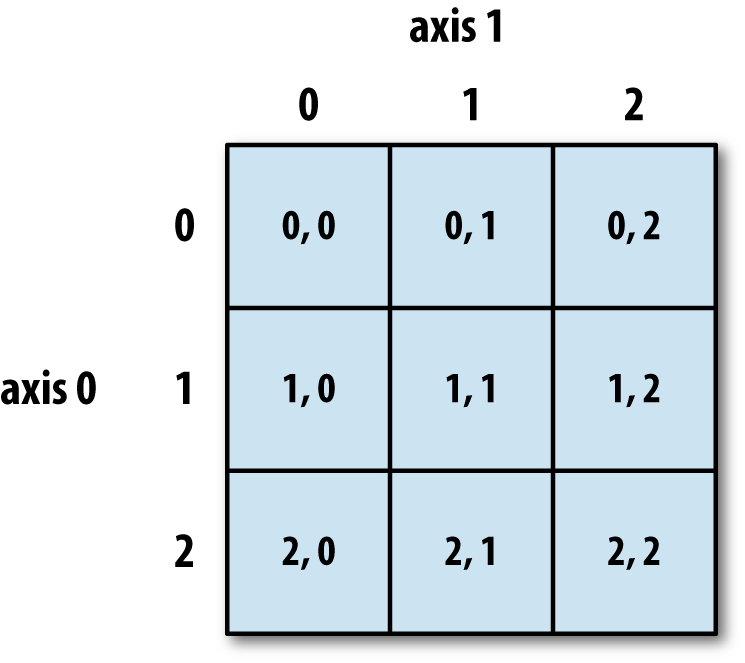

As with lists, if you want an *entire* axis, just use the colon operator all by itself:

In [2]:
import numpy as np
x = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
print(x[2, : ])  # Take ALL of axis 1.

[7 8 9]


In [3]:
print(x[2, 1:])

[8 9]


Here's a great visual summary of slicing NumPy arrays, assuming you're starting from an array with shape (3, 3):

**STUDY THIS CAREFULLY**. This more or less sums up everything you need to know about slicing with NumPy arrays.

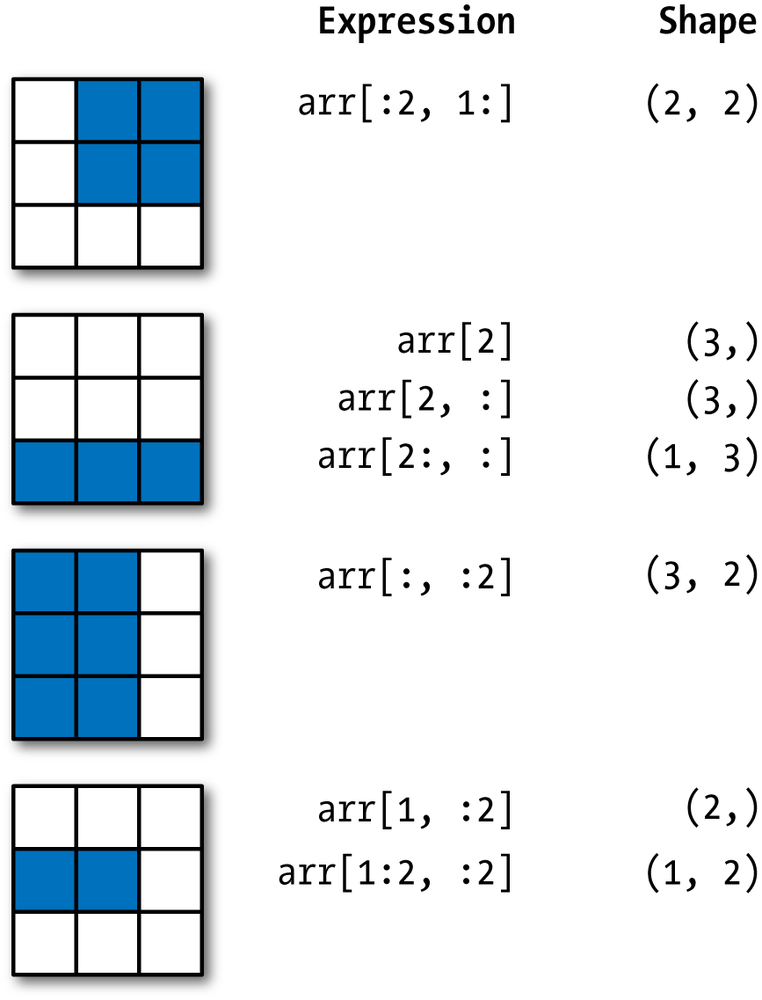

Depending on your field, it's entirely possible that you'll go beyond 2D matrices. If so, it's important to be able to recognize what these structures "look" like.

For example, a video can be thought of as a 3D cube. Put another way, it's a NumPy array with 3 axes: the first axis is height, the second axis is width, and the third axis is number of frames.

In [14]:
video = np.empty(shape = (64, 64, 5))

print("Axis 0 length:", video.shape[0])  # How many rows?

Axis 0 length: 64


In [15]:
print("Axis 1 length:", video.shape[1])  # How many columns?

Axis 1 length: 64


In [16]:
print("Axis 2 length:", video.shape[2])  # How many frames?

Axis 2 length: 5


We know `video` is 3D because we can also access its `ndim` attribute.

In [17]:
print(video.ndim)

3


In [18]:
del video

Another example--to go straight to cutting-edge academic research--is 3D video microscope data of multiple tagged fluorescent markers. This would result in a *five-axis* NumPy object:

In [19]:
tensor = np.empty(shape = (2, 64, 48, 36, 3))
print(tensor.shape)
# Axis 0: color channel--used to differentiate between fluorescent markers
# Axis 1: height--same as before
# Axis 2: width--same as before
# Axis 3: depth--capturing 3D depth at each time interval, like a 3D movie
# Axis 4: frame--same as before

(2, 64, 48, 36, 3)


We can also ask how many elements there are *total*, using the `size` attribute:

In [21]:
print(tensor.size)

663552


In [22]:
del tensor

These are extreme examples, but they're to illustrate how flexible NumPy arrays are.

If in doubt: once you index the first axis, the NumPy array you get back has the shape of all the *remaining* axes.

In [8]:
example = np.empty(shape = (3, 5, 9))
print(example.shape)

(3, 5, 9)


In [9]:
sliced = example[0]  # Indexed the first axis.
print(sliced.shape)

(5, 9)


In [10]:
sliced_again = example[0, 0]  # Indexed the first and second axes.
print(sliced_again.shape)

(9,)


Notice how the number "9", initially the third axis, steadily marches to the front as the axes before it are accessed.

## Part 2: NumPy Array Broadcasting

"Broadcasting" is a fancy term for how Python--specifically, NumPy--handles vectorized operations when arrays of differing shapes are involved. (this is, in some sense, "how the sausage is made")

When you write code like this:

In [5]:
x = np.array([1, 2, 3, 4, 5])
x += 10
print(x)

[11 12 13 14 15]


how does Python know that you want to add the scalar value 10 to each element of the vector `x`? Because (in a word) **broadcasting.**

*Broadcasting* is the operation through which a low(er)-dimensional array is in some way "replicated" to be the same shape as a high(er)-dimensional array.

We saw this in our previous example: the low-dimensional **scalar** was replicated, or *broadcast*, to each element of the array `x` so that the addition operation could be performed element-wise.

This concept can be generalized to higher-dimensional NumPy arrays.

In [28]:
zeros = np.zeros(shape = (3, 4))
print(zeros)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
zeros += 1   # Just add 1.
print(zeros)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In this example, the scalar value 1 is broadcast to all the elements of `zeros`, converting the operation to element-wise addition.

This all happens under the NumPy hood--we don't see it! It "just works"...most of the time.

There are some rules that broadcasting abides by. Essentially, dimensions of arrays need to be "compatible" in order for broadcasting to work. "Compatible" is defined as

 - both dimensions are of equal size (e.g., both have the same number of rows)

 - one of them is 1 (the scalar case)

If these rules aren't met, you get all kinds of strange errors:

In [30]:
x = np.zeros(shape = (3, 3))
y = np.ones((4,4))
x + y

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

But on some intuitive level, this hopefully makes sense: there's no reasonable arithmetic operation that can be performed when you have one $3 \times 3$ matrix and a vector of length 4.

Draw them out if you need to convince yourself--how would add a $3 \times 3$ matrix and a 4-length vector? Or subtract them? There's no way to do it, and Python knows that.

To be rigorous: it's the *trailing* dimensions / axes that you want to make sure line up (as in, the last number that shows up when you do the `.shape` property):

In [31]:
x = np.zeros(shape = (3, 4))
y = np.array([1, 2, 3, 4])
z = x + y
print(z)
print(x.shape, y.shape, z.shape)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]
(3, 4) (4,) (3, 4)


In this example, the shape of `x` is (3, 4). The shape of `y` is just 4. Their trailing axes are both 4, therefore the "smaller" array will be broadcast to fit the size of the larger array, and the operation (addition, in this case) is performed element-wise.

## Part 3: "Fancy" Indexing

Hopefully you have at least an intuitive understanding of how indexing works so far. Unfortunately, it gets more complicated, but still retains a modicum of simplicity.

First: indexing by boolean masks.

### Boolean indexing

We've already seen that you can index by integers. Using the colon operator, you can even specify ranges, slicing out entire swaths of rows and columns.

But suppose we want something very specific; data in our array which satisfies certain criteria, as opposed to data which is found at certain indices?

Put another way: can we pull data out of an array that meets certain conditions?

Let's say you have some data.

In [2]:
import numpy as np
x = np.random.standard_normal(size = (7, 4))
print(x)

[[-0.35212977  0.1949341   0.56706056  2.31437271]
 [ 1.04693698 -0.6930625   0.39093509  2.01722901]
 [-0.89143087 -0.33443786 -0.47325282 -0.12101101]
 [ 0.95177647 -0.66364691 -0.36175812 -0.59620563]
 [-0.22895987 -0.43780754 -0.96005455 -0.48875401]
 [ 1.58752398  0.38457338  1.29034615 -0.11164696]
 [-0.94318268 -1.33634705 -0.57938501  1.38935819]]


This is randomly generated data, yes, but it could easily be 7 data points in 4 dimensions. That is, we have 7 observations of variables with 4 descriptors. Perhaps it's 

 - 7 people who are described by their height, weight, age, and 40-yard dash time, or

 - Data on 7 video games, each described by their PC Gamer rating, Steam downloads count, average number of active players, and total cheating complaints

### The Importance of Preprocessing
Whatever our data, a common first step before any analysis involves some kind of preprocessing (this is just a fancy term for "making sure the data make sense").

If the example we're looking at is the video game scenario from the previous slide, then we know that any negative numbers are junk. After all, how can you have a negative rating? Or a negative number of active players?

Perhaps some goofy players decided to make bogus ratings. Funny to them, perhaps, but not exactly useful to you when you're trying to write an algorithm to recommend games to players based on their ratings. So, you have to "clean" the data a bit.

So our first course of action might be to set all negative numbers in the data to 0.

We could potentially set up a pair of loops--you should know how to do this!--but it's much easier (and faster) to use *boolean indexing*.

First, we create a *mask*. This is what it sounds like: it "masks" certain portions of the data we don't want to change (in this case, all the numbers greater than 0, since we're assuming they're already valid).

In [3]:
mask = x < 0
print(mask)

[[ True False False False]
 [False  True False False]
 [ True  True  True  True]
 [False  True  True  True]
 [ True  True  True  True]
 [False False False  True]
 [ True  True  True False]]


Just for your reference, here's the original data: notice how, in looking at the data below and the boolean mask above, all the spots where there are negative numbers also correspond to "`True`" in the mask?

In [4]:
print(x)

[[-0.35212977  0.1949341   0.56706056  2.31437271]
 [ 1.04693698 -0.6930625   0.39093509  2.01722901]
 [-0.89143087 -0.33443786 -0.47325282 -0.12101101]
 [ 0.95177647 -0.66364691 -0.36175812 -0.59620563]
 [-0.22895987 -0.43780754 -0.96005455 -0.48875401]
 [ 1.58752398  0.38457338  1.29034615 -0.11164696]
 [-0.94318268 -1.33634705 -0.57938501  1.38935819]]


Now, we can use our mask to access *only* the indices we want to set to 0.

In [5]:
x[mask] = 0
print(x)

[[0.         0.1949341  0.56706056 2.31437271]
 [1.04693698 0.         0.39093509 2.01722901]
 [0.         0.         0.         0.        ]
 [0.95177647 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [1.58752398 0.38457338 1.29034615 0.        ]
 [0.         0.         0.         1.38935819]]


*voilà!* Every negative number has been set to 0, and all the other values were left unchanged. Now we can continue with whatever analysis we may have had in mind.

One small caveat with boolean indexing.

 - Yes, you can string multiple boolean conditions together, as you may recall doing in the lecture with conditionals.

 - But... **`and` and `or` DO NOT WORK.** You have to use the arithmetic versions of the operators: `&` (for `and`) and `|` (for `or`).

In [6]:
mask = (x < 1) & (x > 0.5)  # True for any value less than 1 but greater than 0.5
x[mask] = 99                # We're setting any value in this matrix < 1 but > 0.5 to 99
print(x)

[[ 0.          0.1949341  99.          2.31437271]
 [ 1.04693698  0.          0.39093509  2.01722901]
 [ 0.          0.          0.          0.        ]
 [99.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 1.58752398  0.38457338  1.29034615  0.        ]
 [ 0.          0.          0.          1.38935819]]


### Fancy Indexing

"Fancy" indexing is a term coined by the NumPy community to refer to this little indexing trick. To explain is simple enough: **fancy indexing allows you to index arrays with other [integer] arrays.**

Before you go down the Indexing Inception rabbit hole, just keep in mind: it's basically like slicing, but you're condensing the ability to perform multiple slicings all at one time, instead of one at a time.

Now, to demonstrate:

Let's build a 2D array that, for the sake of simplicity, has across each row the index of that row.

In [7]:
matrix = np.empty(shape = (8, 4))
for i in range(8):
    matrix[i] = i  # Broadcasting is happening here!
print(matrix)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


We have 8 rows and 4 columns, where each row is a 4-element vector of the same value repeated across the columns, and that value is the index of the row.

In addition to slicing and boolean indexing, we can also use *other NumPy arrays* to very selectively pick and choose what elements we want, and **even the order in which we want them**.

Let's say I want rows 7, 0, 5, and 2. In that order.

In [8]:
indices = np.array([7, 0, 5, 2])  # Here's my "indexing" array--note the order of the numbers.
print(matrix[indices])

[[7. 7. 7. 7.]
 [0. 0. 0. 0.]
 [5. 5. 5. 5.]
 [2. 2. 2. 2.]]


Ta-daaa! Pretty spiffy!

Row 7 shows up first (we know that because of the straight 7s), followed by row 0, then row 5, then row 2. You could get the same thing if you did `matrix[7]`, then `matrix[0]`, then `matrix[5]`, and finally `matrix[2]`, and then stacked the results into that final matrix. But this just condenses all those steps.

But wait, there's more! Rather than just specifying one dimension, you can provide *tuples* of NumPy arrays that very explicitly pick out certain elements (in a certain order) from another NumPy array.

In [9]:
matrix = np.arange(32).reshape((8, 4))
print(matrix)  # This 8x4 matrix has integer elements that increment by 1 column-wise, then row-wise.

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [10]:
indices = ( np.array([1, 7, 4]), np.array([3, 0, 1]) )  # This is a tuple of 2 NumPy arrays!
print(matrix[indices])

[ 7 28 17]


Ok, this will take a little explaining, bear with me:

When you pass in tuples of NumPy arrays as indices, they act as $(x, y)$ coordinate pairs: the first NumPy array of the tuple is the list of $x$ coordinates, while the second NumPy array is the list of corresponding $y$ coordinates.

In this way, the corresponding elements of the two NumPy arrays in the tuple give you the row and column indices to be selected from the original NumPy array.

In our previous example, this was our tuple of indices:

In [ ]:
( np.array([1, 7, 4]), np.array([3, 0, 1]) )

The $x$ coordinates are in `array([1, 7, 4])`, and the $y$ coordinates are in `array([3, 0, 1])`. More concretely:

 - The first element to take from the matrix is `(1, 3)`--this is the 7 that was printed!
 - The second element is at `(7, 0)`--this is the 28 that followed.
 - The final element is at `(4, 1)`--this corresponds to the 17!

**Go back a few slides to the $8 \times 4$ `matrix` array to convince yourself this is what is happening.**

Fancy indexing can be tricky at first, but it can be very useful when you want to pull very specific elements out of a NumPy array and in a very specific order.

Fancy indexing is **super advanced stuff**, but if you put in the time to practice, it can all but completely eliminate the need to use loops.

Don't worry if you're confused right now. That's absolutely alright--this lecture and Lecture 8 are **easily the most difficult if you've never done any programming before**. Be patient with yourself, practice what you see in this lecture using the code (and tweaking it to see what happens), and ask questions!

## Review Questions

Some questions to discuss and consider:

1: Given some arbitrary NumPy array and only access to its `.shape` attribute (as well as its elements), describe (in words or in Python pseudocode) how you would compute exactly how many individual elements exist in the array (as in, you can't use `.size`).

2: Broadcasting hints that there is more happening under the hood than meets the eye with NumPy. With this in mind, do you think it would be more or less efficient to write a loop yourself in Python to add a scalar to each element in a Python list, rather than use NumPy broadcasting? Why or why not?


3: I have a 2D matrix, where the rows represent individual gamers, and the columns represent games. There's a "1" in the column if the gamer won that game, and a "0" if they lost. Describe how you might use boolean indexing to select only the rows corresponding to gamers whose average score was above a certain `threshold`.

4: Show how you could reverse the elements of a 1D NumPy array using one line of code, no loops, and fancy indexing.

5: Let's say I create the following NumPy array: `a = np.zeros(shape = (100, 50, 25, 10))`. What is the shape of the resulting array when I index it as follows: `a[:, 0]`?

## Additional Resources

 1. McKinney, Wes. *Python for Data Analysis*. 2012. ISBN-13: 860-1400898857
 2. NumPy documentation on array broadcasting http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
 3. NumPy documentation on indexing http://docs.scipy.org/doc/numpy/user/basics.indexing.html
 4. *Broadcasting Arrays in NumPy*. http://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/
